In [26]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load Dataset

# Load Another Dataset (This has missing dates)

airline = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/airline_passengers.csv',
                      index_col = 'Month', parse_dates = True)

airline.dropna() # Drop all missing data, if there is any
airline.head(5)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
# Define an Index Frequency with .index.freq = [value]

airline.index.freq = 'MS'

# Holt-Winters

**Holt-Winters** method is a popular and effective approach to forecasting in time series analysis, especially when the data exhibits not only a trend but also some form of seasonality.

This method is an extension of the Exponential Smoothing technique, which is used to produce smoothed data points by assigning exponentially decreasing weights to past observations. While simple Exponential Smoothing is suitable for data without trend and seasonality, Holt-Winters method accommodates both.

***There are two main variations of the Holt-Winters method:***

- **Additive Model:** Used when the seasonal variations are roughly constant throughout the series.

- **Multiplicative Model:** Used when the seasonal variations change proportionally to the level of the series.

***The method involves three types of smoothing:***

- **Level (Lt):** The average value in the series.

- **Trend (Tt):** The increasing or decreasing value in the series.

- **Seasonality (St)**: The repeated pattern observed in the series over a fixed period.

***Methaphor:***

Imagine you're trying to predict the amount of ice cream sold at a beach over time. The level is the average sales, which might increase on hot days (trend), and there are certain times of the year, like summer, when sales spike (seasonality). The Holt-Winters method is like adjusting your expectations based on not just how busy the beach was yesterday (level), but also whether it's getting busier or quieter as the season progresses (trend), and if you're approaching a time of year when sales usually go up or down (seasonality).

## Single Exponential Smoothing

**Single Exponential Smoothing (SES)** is a forecasting method used for univariate time series data that does not exhibit trends or seasonality. It is particularly useful for smoothing out short-term fluctuations and highlighting longer-term trends or cycles. The method applies exponentially decreasing weights to past observations, meaning more recent observations have more influence on the forecast than older observations.

Since ***SES*** mainly focuses on recent observations while gradually decreasing the weight for older observations, it can adapt to changes in the trend more flexibly than a simple moving average. However, it does not explicitly model the trend or seasonal components.

The ***choice of alpha*** reflects the weight given to the most recent observation. A lower alpha places more emphasis on older data, leading to smoother lines but potentially slower response to recent changes. Conversely, a higher alpha gives more weight to recent observations, making the smoothed line more responsive to recent changes but also more susceptible to random fluctuations.

A general guide to select the alpha is: alpha = 2 / (span + 1):
where span is the observed seasonality

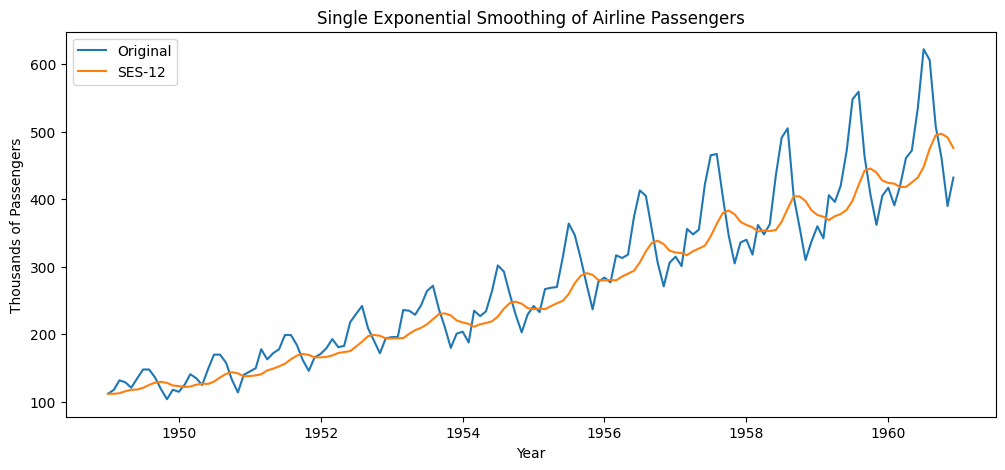

In [29]:
# Global Graph Sizing

from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

# Apply single exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2 / (span + 1)

model = SimpleExpSmoothing(airline['Thousands of Passengers'])
fit_model = model.fit(smoothing_level = alpha, optimized = False)

# Predict the values using the fitted model

airline['SES-12'] = fit_model.fittedvalues

# Plot the original data and the smoothed data

plt.plot(airline['Thousands of Passengers'], label = 'Original')
plt.plot(airline['SES-12'], label = 'SES-12')
plt.title('Single Exponential Smoothing of Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Thousands of Passengers')
plt.legend()
plt.show()

# NOTE:
# The optimized=False parameter used in the single exponential smoothing model setup indicates that the
# smoothing level (alpha) will not be automatically optimized based on the given dataset.
# Instead, the model uses the value of alpha that you explicitly specify.
# In the context of the code provided, we manually set the smoothing levelwithout allowing the
# model to find the best smoothing level (alpha) that minimizes the forecast error.

In [30]:
# INTERPRETATION:

# The Single Exponential Smoothing (SES) line demonstrates the effect of smoothing, where the peaks and troughs are
# less pronounced compared to the original data. The SES line provides a smoothed trend of the data, reducing the
# impact of random variations and highlighting the general direction of the data over time.

# Since SES mainly focuses on recent observations while gradually decreasing the weight for older observations,
# it can adapt to changes in the trend more flexibly than a simple moving average.
# However, it does not explicitly model the trend or seasonal components.

# Given the visible trend and seasonality in the data, more complex models like
# Double Exponential Smoothing or Holt-Winters Exponential Smoothing might provide a
# more accurate fit by explicitly modeling these components.

In [31]:
# Is EWMA and SES the same?

airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(alpha = alpha, adjust = False).mean() # This is a 12-Month SMA
airline

,Thousands of Passengers,SES-12,EWMA-12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.000000,112.923077
1949-03-01,132,112.923077,115.857988
1949-04-01,129,115.857988,117.879836
1949-05-01,121,117.879836,118.359861
...,...,...,...
1960-08-01,606,474.698368,494.898619
1960-09-01,508,494.898619,496.914216
1960-10-01,461,496.914216,491.388952


## Double Exponential Smoothing

***Double Exponential Smoothing (DES)***, also known as Holt’s Linear Trend Method, extends Single Exponential Smoothing to capture information about the trend of the data. This method is suitable for data with trends but without seasonal or cyclical patterns.

In ***DES***, two components are smoothed: the level (i.e., the average value in the series) and the trend. This approach allows the method to adjust its estimates not just for the most recent observation, but also for the most recent trend in the data.

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply double exponential smoothing

des_a = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'additive')
des_a_fit = des_a.fit()

airline['DES-12 (additive)'] = des_a_fit.fittedvalues # Get fittedvalues and assign to a DataFrame column
#airline

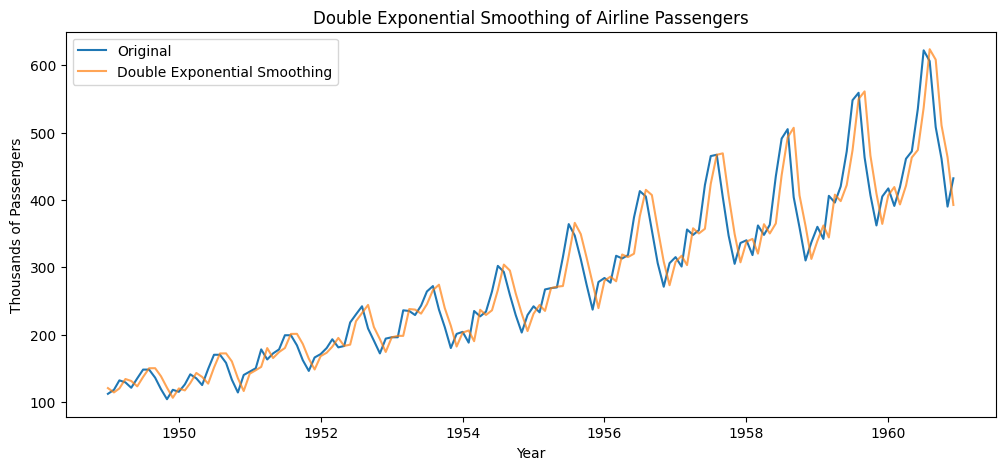

In [33]:
# Plot the original data and the double exponential smoothing data

plt.plot(airline['Thousands of Passengers'], label='Original')
plt.plot(airline['DES-12 (additive)'], label='Double Exponential Smoothing', alpha = 0.7)
plt.title('Double Exponential Smoothing of Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Thousands of Passengers')
plt.legend()
plt.show()

In [34]:
# INTERPRETATION:

# Original Data Trend:
# The original data shows a clear upward trend and seasonal fluctuations over time.
# The number of passengers increases, indicating growth and periodic patterns within the airline industry.

# Double Exponential Smoothing (DES) Line: This line captures both the level and the trend of the data.
# Unlike Single Exponential Smoothing, which only smooths the series, DES adjusts for the trend, making
# it more responsive to changes in the direction of the data over time.

# Trend Adjustment: The DES model incorporates an additive trend component, which is suitable for data where the trend is linear and
# the increments or decrements over time are roughly constant. The DES line closely follows the upward trend of the original data,
# adapting to changes in the trend direction more effectively than Single Exponential Smoothing.

# Model Fit: The fit appears to be quite good, especially for capturing the overall direction and trend of the time series.
# However, because Double Exponential Smoothing does not account for seasonality, it cannot capture
# the regular peaks and troughs seen in the data, which correspond to seasonal increases and decreases in airline passengers.

# Application Considerations: Double Exponential Smoothing is more sophisticated than Single Exponential Smoothing,
# making it better suited for data with trends. However, for time series data with both trend and seasonality (like this dataset),
# a model that can also account for seasonal components, such as Triple Exponential Smoothing (also known as Holt-Winters Seasonal Method),
# might provide an even more accurate fit.

## Triple Exponential Smoothing

***Triple Exponential Smoothing (TES)***, also known as the Holt-Winters method, extends Double Exponential Smoothing by adding a seasonal component. This method is suitable for data with trends and seasonality. It smooths three components:

- **Level:** The average value in the series.
- **Trend:** The increase or decrease in the series over time.
- **Seasonality:** The repeating short-term cycle in the series.

The Holt-Winters method can handle both additive and multiplicative seasonality. Given the clear seasonal pattern in the airline passengers dataset, along with an overall trend, Triple Exponential Smoothing should provide a good fit by accounting for both these aspects.

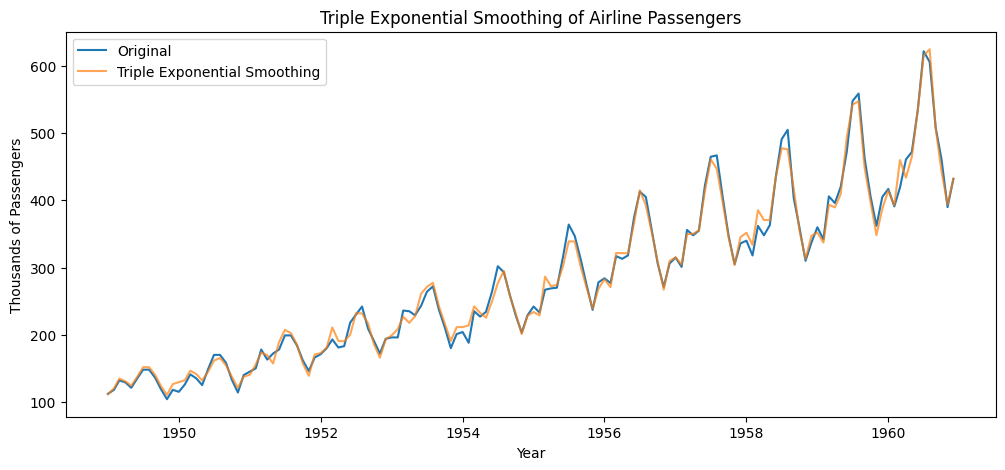

In [35]:
# Apply triple exponential smoothing (Holt-Winters method)

triple_model = ExponentialSmoothing(airline['Thousands of Passengers'], trend = 'additive',
                                    seasonal = 'multiplicative', seasonal_periods=12)

triple_fit_model = triple_model.fit()

airline['TES-12 (t = add, sea = mul, span = 12)'] = triple_fit_model.fittedvalues

# Plot the original data and the triple exponential smoothing data

plt.plot(airline['Thousands of Passengers'], label='Original')
plt.plot(airline['TES-12 (t = add, sea = mul, span = 12)'], label='Triple Exponential Smoothing', alpha = 0.7)
plt.title('Triple Exponential Smoothing of Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Thousands of Passengers')
plt.legend()
plt.show()

In [36]:
# INTERPREATION

# Seasonality Handling:
# The Triple Exponential Smoothing model captures the seasonal fluctuations
# in the data exceptionally well. By incorporating a multiplicative seasonal component,
# it effectively models the increasing amplitude of seasonal patterns as the overall
# level of passengers grows over time. This is evident in the way the smoothed series aligns closely
# with the peaks and troughs of the original data.

# Trend and Level Adjustment:
# In addition to seasonality, the model also adjusts for the level and trend of the series, providing a
# nuanced understanding of the underlying growth pattern beyond seasonal variations.
# The trend component is additive, suggesting a constant amount of growth over time, while
# the level adjustment ensures the smoothed series closely tracks the central tendency of the data.

# Model Fit:
# The fit of the Triple Exponential Smoothing model to the data is visibly superior to both Single
# and Double Exponential Smoothing for this dataset. It not only follows the overall upward trend but
# also mirrors the seasonal peaks and troughs accurately, showcasing its effectiveness in
# capturing the complex patterns present in the data.

# Forecasting Capability:
# With its ability to model level, trend, and seasonality, Triple Exponential Smoothing is well-equipped for
# forecasting future values in time series data that exhibit similar patterns. It can anticipate both the direction
# and magnitude of seasonal fluctuations and trends, making it a powerful tool for planning and decision-making processes.

<Axes: xlabel='Month'>

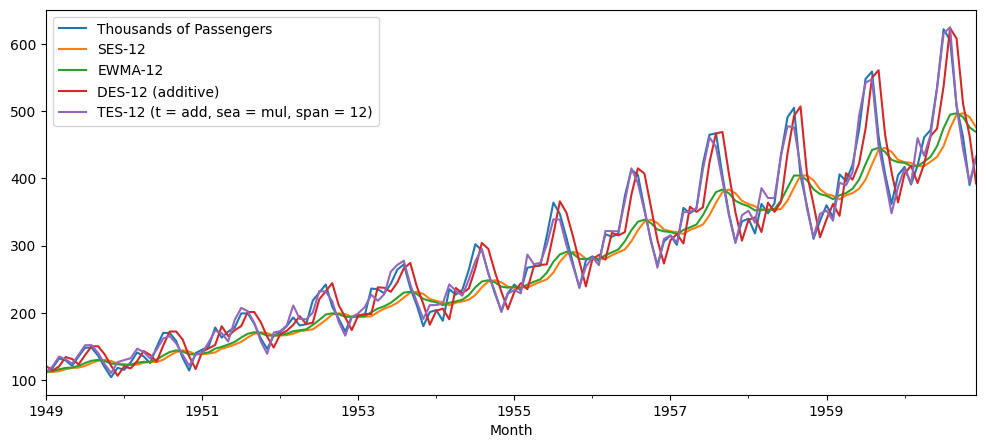

In [37]:
# Overall Comparison

airline.plot()

In [38]:
# Great Job!